<a href="https://colab.research.google.com/github/NiyonshutiDavid/Intro2ML_Summative/blob/main/Summative_Intro_to_ml_%5BDavid%20Niyonshuti%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [1]:
#Import Necessary Libraries
!pip install tensorflow
!pip install tensorflow-addons
!pip install tensorflow-datasets
import os 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad, Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score


zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


ModuleNotFoundError: No module named 'tensorflow'

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [2]:
# Check the current working directory
print("Current working directory:", os.getcwd())
print('Print working directory contents:', os.listdir())

Current working directory: /workspaces/Intro2ML_Summative
Print working directory contents: ['.git', 'Summative_Intro_to_ml_[David Niyonshuti]_assignment.ipynb', 'README.md', 'big_startup_secsees_dataset.csv']


In [3]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
data = pd.read_csv('big_startup_secsees_dataset.csv')
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [4]:
print("Dataset description:")
print(data.describe())
print("\n Total rows and columns in the dataset:", data.shape)
data.info()
data.mean()# 

Dataset description:
       funding_rounds
count    66368.000000
mean         1.732522
std          1.360251
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000

 Total rows and columns in the dataset: (66368, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  fou

In [5]:
# Check if there is any missing data in each column
print('Check if there is any missing data from all columns:\n')
print(data.isnull().sum())

# Check the data type of each column
print('\nData type of each column:\n')
print(data.dtypes)

Check if there is any missing data from all columns:

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

Data type of each column:

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object


In [9]:
# Data Cleaning and Preprocessing


# --- 1. Handle 'funding_total_usd' column ---
data['funding_total_usd'] = data['funding_total_usd'].astype(str).str.replace(r'[$,\s]', '', regex=True)
data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')
print(f"Data type of 'funding_total_usd' after conversion: {data['funding_total_usd'].dtype}")
print(f"Missing values in 'funding_total_usd' after conversion: {data['funding_total_usd'].isnull().sum()}")

# --- 2. Handle Date Columns ---
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')
    print(f"Data type of '{col}' after conversion: {data[col].dtype}")
    print(f"Missing values (NaT) in '{col}' after conversion: {data[col].isnull().sum()}")

# --- 3. Handle Other Missing Data ---

# 'name': Drop rows with missing 'name'
if data['name'].isnull().sum() > 0:
    data.dropna(subset=['name'], inplace=True)

# 'category_list': Fill with 'Unknown_Category'
data['category_list'].fillna('Unknown_Category', inplace=True)

# Geographical Columns: Fill with 'Unknown_ColumnName'
geo_cols = ['country_code', 'state_code', 'region', 'city']
for col in geo_cols:
    data[col].fillna(f'Unknown_{col}', inplace=True)

# --- Final Check ---
print("\n--- Data Cleaning Summary ---")
print("Missing values after cleaning:")
print(data.isnull().sum())
print("\nData types after cleaning:")
print(data.dtypes)
print(f"\nDataFrame shape after cleaning: {data.shape}")
print("\nFirst few rows of the cleaned dataset:")
print(data.head())

Data type of 'funding_total_usd' after conversion: float64
Missing values in 'funding_total_usd' after conversion: 12785
Data type of 'founded_at' after conversion: datetime64[ns]
Missing values (NaT) in 'founded_at' after conversion: 15225
Data type of 'first_funding_at' after conversion: datetime64[ns]
Missing values (NaT) in 'first_funding_at' after conversion: 27
Data type of 'last_funding_at' after conversion: datetime64[ns]
Missing values (NaT) in 'last_funding_at' after conversion: 0

--- Data Cleaning Summary ---
Missing values after cleaning:
permalink                0
name                     0
homepage_url          5058
category_list            0
funding_total_usd    12785
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           15225
first_funding_at        27
last_funding_at          0
dtype: int64

Data types after cleaning:
permalink              

/tmp/ipykernel_22152/3498596808.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['category_list'].fillna('Unknown_Category', inplace=True)
/tmp/ipykernel_22152/3498596808.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [10]:
data.isnull().sum()

permalink                0
name                     0
homepage_url          5058
category_list            0
funding_total_usd    12785
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           15225
first_funding_at        27
last_funding_at          0
dtype: int64

In [16]:
import re

# Define the regex pattern for 'agriculture'.
# r'.*agriculture.*' matches 'agriculture' anywhere in the string.
# re.IGNORECASE makes the search case-insensitive.
agriculture_pattern = r'agri'


# Filter the DataFrame for companies in the agriculture sector
agriculture_companies = data[
    data['category_list'].astype(str).str.contains(agriculture_pattern, case=False, na=False)
]

# Get the total count of such companies
total_agriculture_companies = len(agriculture_companies)

print(f"Total number of companies in the agriculture sector (using regex): {total_agriculture_companies}")

print(agriculture_companies[['name', 'category_list']].head())

Total number of companies in the agriculture sector (using regex): 149
          name                                      category_list
1028    Acopio                       Agriculture|Analytics|Coffee
1985   AgLocal  Agriculture|Business Services|Consumers|Hospit...
2008   Agrar33             Agriculture|E-Commerce|Online Shopping
2009  Agrariya  Agriculture|Business Services|E-Commerce|Farme...
2013   Agrible  Agriculture|Big Data|Information Services|Prod...


/tmp/ipykernel_22152/980038085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=agriculture_companies, y='country_code', order=agriculture_companies['country_code'].value_counts().index, palette='mako')


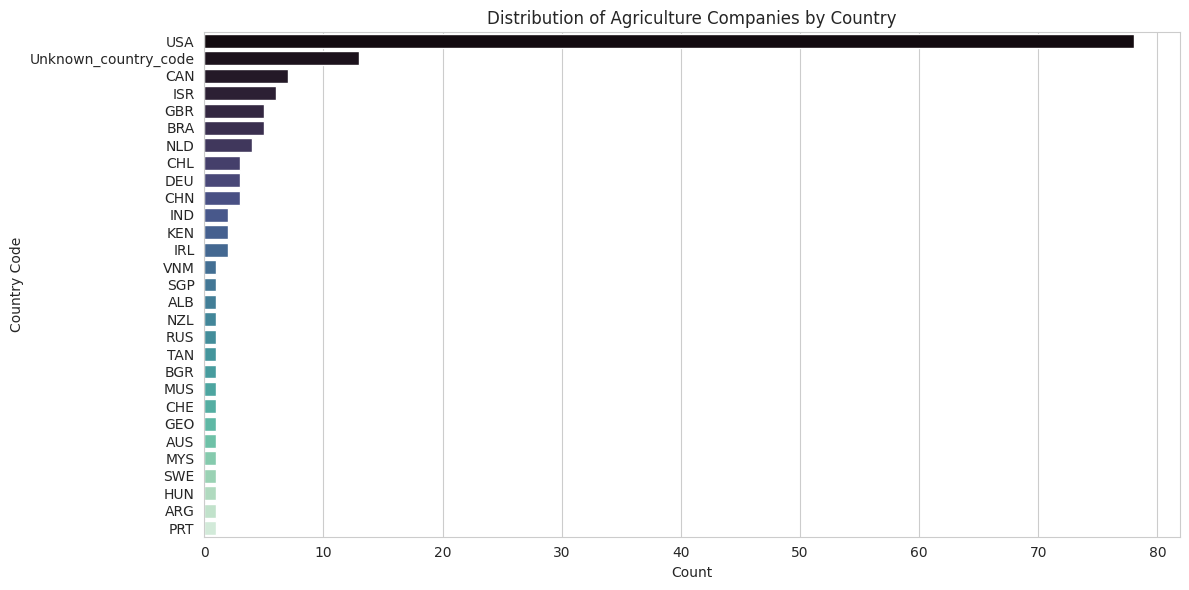

In [17]:
# Plot the distribution of agriculture companies by country
plt.figure(figsize=(12, 6))
sns.countplot(data=agriculture_companies, y='country_code', order=agriculture_companies['country_code'].value_counts().index, palette='mako')
plt.title('Distribution of Agriculture Companies by Country')
plt.xlabel('Count')
plt.ylabel('Country Code')
plt.tight_layout()
plt.show()

In [18]:
# --- Company Classification Based on Funding Status ---
# Define the conditions for each class
# We process 'Rejected' first as it's a definitive end-state,
# then 'Funding Eligible' as it signifies success/readiness,
# and finally 'Mentorship Needed' as the default for active but unfunded companies.

conditions = [
    # 1. Rejected
    (data['status'] == 'closed'),

    # 2. Funding Eligible
    (data['status'] == 'acquired') |
    ((data['status'] == 'operating') & (data['funding_total_usd'] > 0)),

    # 3. Mentorship Needed
    # This captures 'operating' companies with 0 or NaN funding_total_usd
    ((data['status'] == 'operating') & ((data['funding_total_usd'] == 0) | (data['funding_total_usd'].isnull())))
]

# Define the corresponding values for each class
choices = ['Rejected', 'Funding Eligible', 'Mentorship Needed']

# Apply the conditions to create the new 'funding_class' column
# Any rows not fitting these conditions (e.g., if there are other 'status' types)
# will be assigned 'Other' or can be left as NaN if you prefer.
data['funding_class'] = np.select(conditions, choices, default='Unclassified')

# --- Verification and Summary ---
print("--- Company Classification Summary ---")
print("\nDistribution of Companies by Funding Class:")
print(data['funding_class'].value_counts())

print("\nCharacteristics of each class (based on defined criteria):")

print("\n1. Rejected Class:")
rejected_companies = data[data['funding_class'] == 'Rejected']
print(f"  - Count: {len(rejected_companies)}")
print(f"  - Status Distribution:\n{rejected_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {rejected_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {rejected_companies['funding_rounds'].mean():.2f}")


print("\n2. Funding Eligible Class:")
eligible_companies = data[data['funding_class'] == 'Funding Eligible']
print(f"  - Count: {len(eligible_companies)}")
print(f"  - Status Distribution:\n{eligible_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {eligible_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {eligible_companies['funding_rounds'].mean():.2f}")


print("\n3. Mentorship Needed Class:")
mentorship_companies = data[data['funding_class'] == 'Mentorship Needed']
print(f"  - Count: {len(mentorship_companies)}")
print(f"  - Status Distribution:\n{mentorship_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {mentorship_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {mentorship_companies['funding_rounds'].mean():.2f}")

# Optional: Check if any companies were 'Unclassified'
if 'Unclassified' in data['funding_class'].unique():
    print(f"\nUnclassified companies count: {data['funding_class'].value_counts().get('Unclassified', 0)}")
    print("These are companies that did not fit the defined criteria for Rejected, Funding Eligible, or Mentorship Needed.")

--- Company Classification Summary ---

Distribution of Companies by Funding Class:
funding_class
Funding Eligible     47989
Mentorship Needed    10594
Rejected              6237
Unclassified          1547
Name: count, dtype: int64

Characteristics of each class (based on defined criteria):

1. Rejected Class:
  - Count: 6237
  - Status Distribution:
status
closed    6237
Name: count, dtype: int64
  - Avg Funding Total USD: 10,900,158.94
  - Avg Funding Rounds: 1.40

2. Funding Eligible Class:
  - Count: 47989
  - Status Distribution:
status
operating    42440
acquired      5549
Name: count, dtype: int64
  - Avg Funding Total USD: 15,385,288.02
  - Avg Funding Rounds: 1.88

3. Mentorship Needed Class:
  - Count: 10594
  - Status Distribution:
status
operating    10594
Name: count, dtype: int64
  - Avg Funding Total USD: nan
  - Avg Funding Rounds: 1.12

Unclassified companies count: 1547
These are companies that did not fit the defined criteria for Rejected, Funding Eligible, or Mentor

In [22]:
print("\n--- Data Overview After Classification ---")
print(data[['name', 'status', 'funding_total_usd', 'funding_rounds', 'funding_class']].head())
print("\nColumns in the dataset:")
print(data.columns.tolist())


--- Data Overview After Classification ---
                     name     status  funding_total_usd  funding_rounds  \
0                   #fame  operating         10000000.0               1   
1                :Qounter  operating           700000.0               2   
2  (THE) ONE of THEM,Inc.  operating          3406878.0               1   
3                 0-6.com  operating          2000000.0               1   
4        004 Technologies  operating                NaN               1   

       funding_class  
0   Funding Eligible  
1   Funding Eligible  
2   Funding Eligible  
3   Funding Eligible  
4  Mentorship Needed  

Columns in the dataset:
['permalink', 'name', 'homepage_url', 'category_list', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at', 'funding_class']


--- Generating Plots after Classification ---


/tmp/ipykernel_22152/1367101758.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='funding_class', palette='coolwarm',


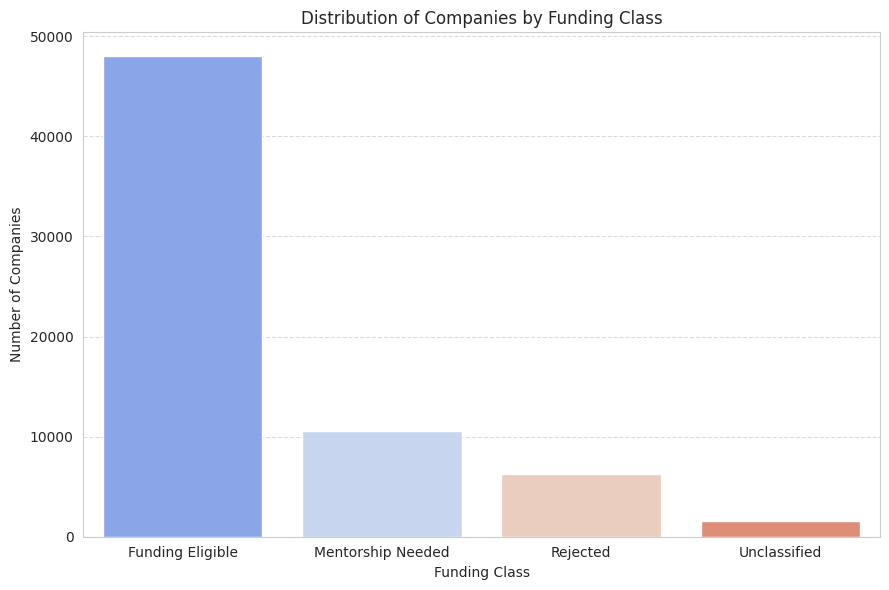

/tmp/ipykernel_22152/1367101758.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data_funding, x='funding_class', y='funding_total_usd_log', palette='viridis',


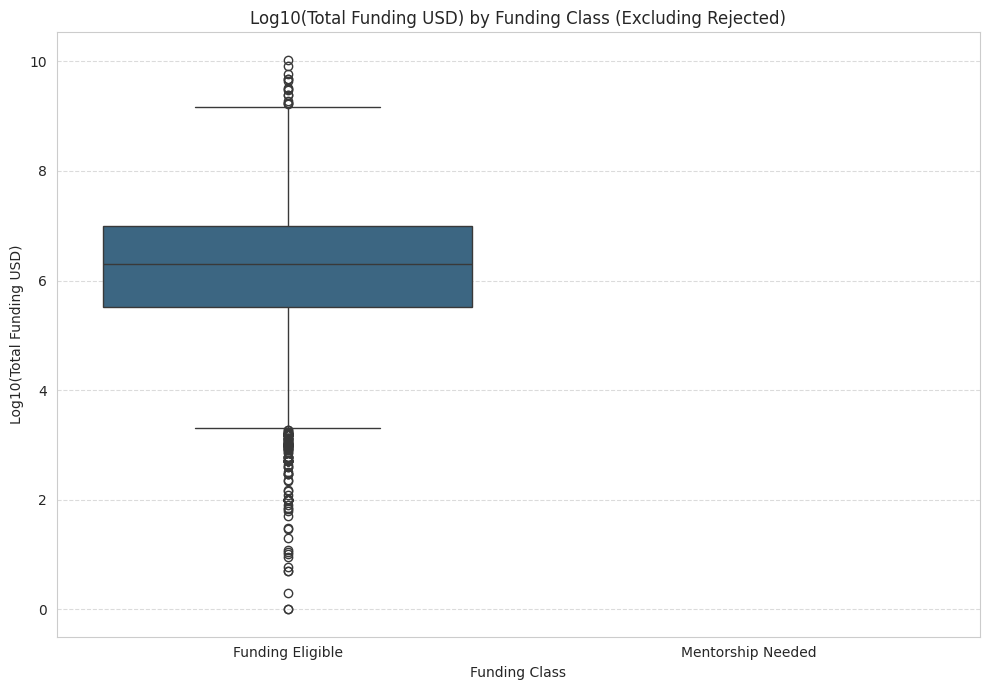

/tmp/ipykernel_22152/1367101758.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='funding_class', y='funding_rounds', palette='plasma',


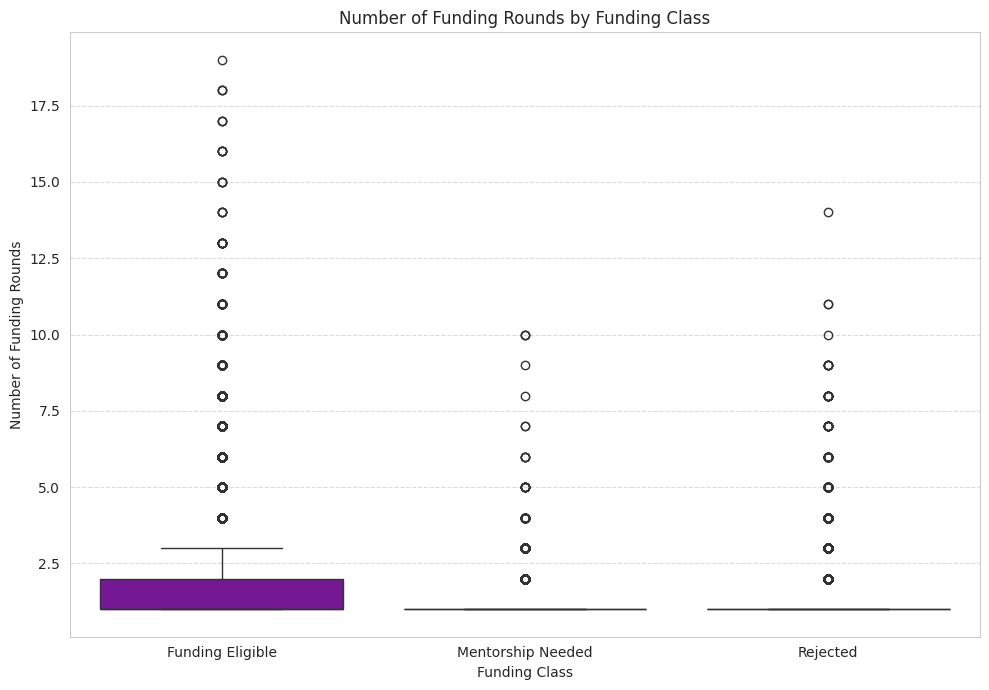

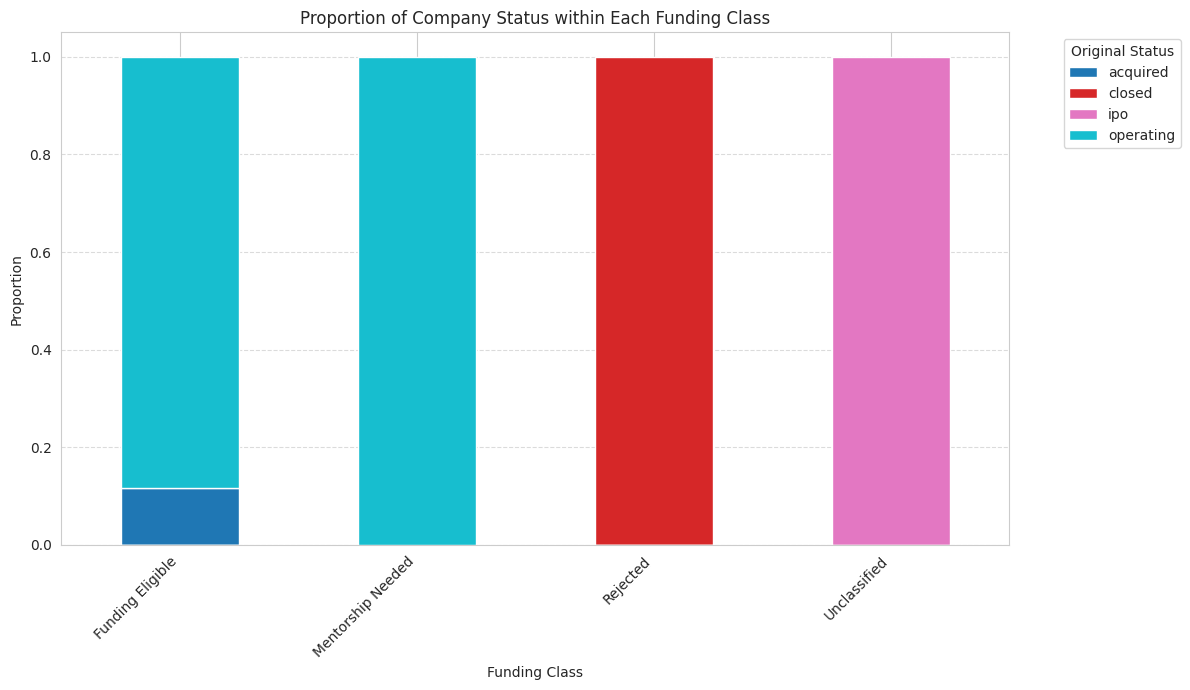


--- Top 10 Categories by Funding Class ---


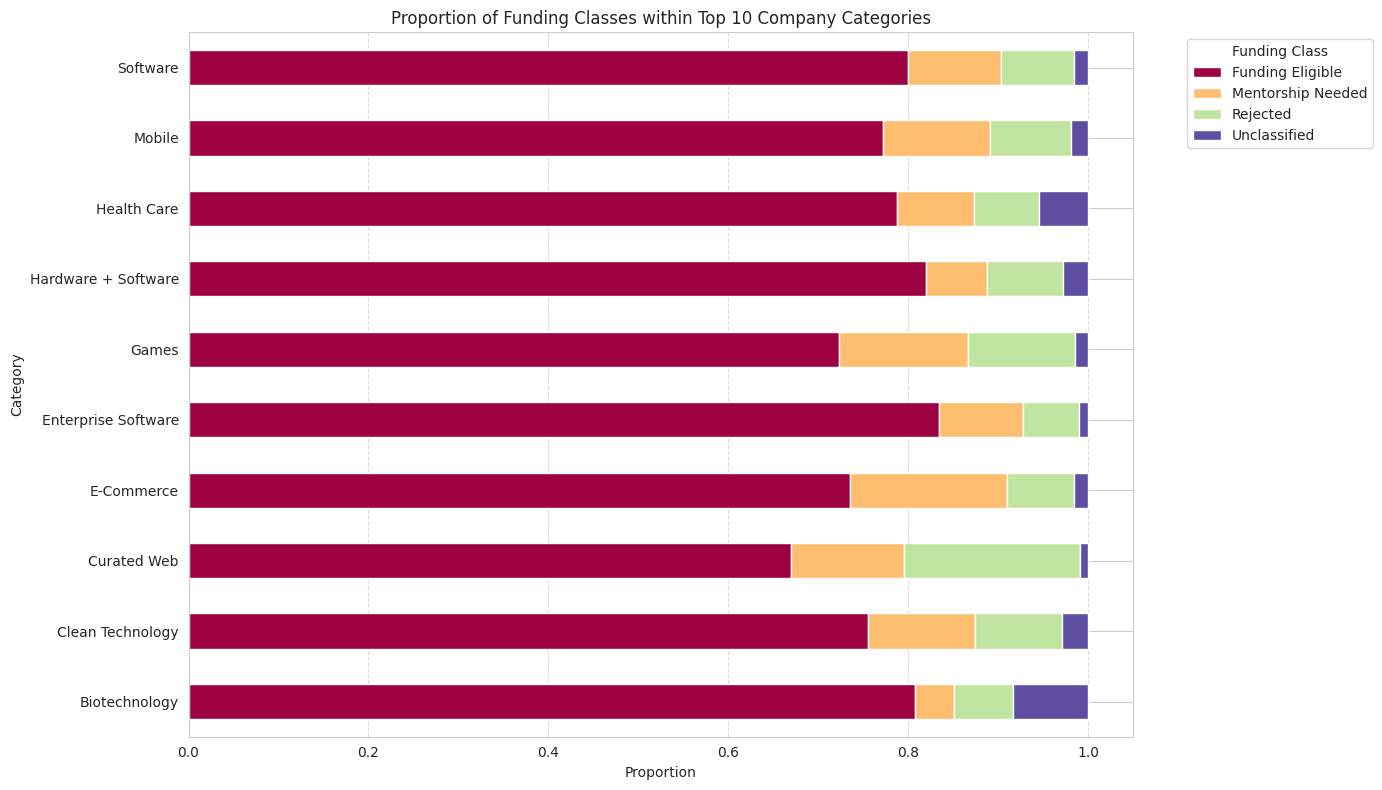

In [23]:

# Set a consistent style for the plots
sns.set_style("whitegrid")

print("--- Generating Plots after Classification ---")

# --- 1. Distribution of 'funding_class' ---
plt.figure(figsize=(9, 6))
sns.countplot(data=data, x='funding_class', palette='coolwarm',
              order=data['funding_class'].value_counts().index)
plt.title('Distribution of Companies by Funding Class')
plt.xlabel('Funding Class')
plt.ylabel('Number of Companies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 2. 'funding_total_usd' by 'funding_class' (Box Plot) ---
plt.figure(figsize=(10, 7))
# Filter out 0 or NaN funding_total_usd for a clearer log scale plot
# Use a small constant (e.g., 1) to avoid log(0) errors if there are actual 0s you want to include
plot_data_funding = data[data['funding_class'] != 'Rejected'].copy()
plot_data_funding['funding_total_usd_log'] = plot_data_funding['funding_total_usd'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

sns.boxplot(data=plot_data_funding, x='funding_class', y='funding_total_usd_log', palette='viridis',
            order=['Funding Eligible', 'Mentorship Needed'])
plt.title('Log10(Total Funding USD) by Funding Class (Excluding Rejected)')
plt.xlabel('Funding Class')
plt.ylabel('Log10(Total Funding USD)')
# Add custom y-tick labels if you want to show actual dollar amounts,
# e.g., using 10**tick_value for labels.
# For simplicity, keeping log10 labels here.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 3. 'funding_rounds' by 'funding_class' (Box Plot) ---
plt.figure(figsize=(10, 7))
sns.boxplot(data=data, x='funding_class', y='funding_rounds', palette='plasma',
            order=['Funding Eligible', 'Mentorship Needed', 'Rejected']) # Include all classes here
plt.title('Number of Funding Rounds by Funding Class')
plt.xlabel('Funding Class')
plt.ylabel('Number of Funding Rounds')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 4. Status Distribution within 'funding_class' (Stacked Bar Plot) ---
# Create a cross-tabulation of funding_class and status
status_cross_tab = pd.crosstab(data['funding_class'], data['status'], normalize='index')

plt.figure(figsize=(12, 7))
status_cross_tab.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())
plt.title('Proportion of Company Status within Each Funding Class')
plt.xlabel('Funding Class')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Original Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 5. Top 10 'category_list' Distribution by 'funding_class' ---
print("\n--- Top 10 Categories by Funding Class ---")
# Get top 10 categories overall (excluding 'Unknown_Category' for this analysis)
top_categories = data[data['category_list'] != 'Unknown_Category']['category_list'].value_counts().nlargest(10).index

# Filter the DataFrame to include only these top categories and funding classes
filtered_data = data[data['category_list'].isin(top_categories)]

# Create a cross-tabulation for selected categories and funding classes
category_class_cross_tab = pd.crosstab(filtered_data['category_list'], filtered_data['funding_class'], normalize='index')

plt.figure(figsize=(14, 8))
category_class_cross_tab.plot(kind='barh', stacked=True, colormap='Spectral', ax=plt.gca())
plt.title('Proportion of Funding Classes within Top 10 Company Categories')
plt.xlabel('Proportion')
plt.ylabel('Category')
plt.legend(title='Funding Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
# Import necessary libraries for data preparation

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# --- Data Preparation for Machine Learning ---
# --- 1. Separate Features (X) and Target (y) ---
# Features to drop due to data leakage or irrelevance for prediction
features_to_drop = [
    'status', 'funding_total_usd', 'funding_rounds',
    'first_funding_at', 'last_funding_at',
    'permalink', 'name', 'homepage_url'
]

X = data.drop(columns=features_to_drop + ['funding_class'])
y = data['funding_class']

print(f"Initial features for X: {X.columns.tolist()}")
print(f"Target variable y: {y.name}")

# --- 2. Feature Engineering: Company Age from 'founded_at' ---
# Convert 'founded_at' to company age in years
# Assuming current year is 2024 for simplicity (adjust if you have a specific reference date)
# Let's use the current date (June 17, 2025) as a reference point for age calculation
reference_date = pd.Timestamp('2025-06-17')
X['company_age_years'] = (reference_date - X['founded_at']).dt.days / 365.25
X.drop(columns=['founded_at'], inplace=True) # Drop the original datetime column
print(f"\nAdded 'company_age_years' and dropped 'founded_at'. New features: {X.columns.tolist()}")

# --- 3. Identify Column Types for Preprocessing ---
numerical_features = ['company_age_years']
categorical_features = ['category_list', 'country_code', 'state_code', 'region', 'city']

# Ensure all identified categorical columns are actually in X
categorical_features = [col for col in categorical_features if col in X.columns]
numerical_features = [col for col in numerical_features if col in X.columns]

# --- 4. Define Preprocessing Steps using ColumnTransformer ---
# For numerical features: Impute NaNs (if any remain) and then Standardize
# For categorical features: Impute NaNs (if any remain from 'Unknown_Category') and then One-Hot Encode

# Check for NaNs in numerical features before processing, if any, decide imputation strategy
# For 'company_age_years', NaNs would mean 'founded_at' was NaT. We need to handle this.
# A common strategy is to impute with the mean/median, or drop rows if few.
# For simplicity here, let's impute with median for numerical.
# For categorical, NaNs should be handled by OneHotEncoder's handle_unknown='ignore' or by prior .fillna().
# Our previous cleaning filled with 'Unknown_ColumnName', so technically there should be no NaNs now.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features) # <--- CHANGE THIS LINE
    ])
# --- 5. Data Splitting (Train, Validation, Test) ---
# First, split into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Then, split temp into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nData split sizes:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Validation set: {X_val.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

# --- 6. Apply Preprocessing Pipeline ---
# Use a Pipeline to apply preprocessing (transformations)
# Fit the preprocessor ONLY on the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform validation and test data using the fitted preprocessor
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print(f"\nShape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed validation data: {X_val_processed.shape}")
print(f"Shape of processed test data: {X_test_processed.shape}")

# Also need to convert target labels to numerical for Keras
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

print(f"\nEncoded target classes: {label_encoder.classes_}")
print(f"Example encoded labels (y_train_encoded[:5]): {y_train_encoded[:5]}")


Initial features for X: ['category_list', 'country_code', 'state_code', 'region', 'city', 'founded_at']
Target variable y: funding_class

Added 'company_age_years' and dropped 'founded_at'. New features: ['category_list', 'country_code', 'state_code', 'region', 'city', 'company_age_years']

Data split sizes:
  Training set: 53093 samples
  Validation set: 6637 samples
  Test set: 6637 samples



Shape of processed training data: (53093, 28306)
Shape of processed validation data: (6637, 28306)
Shape of processed test data: (6637, 28306)

Encoded target classes: ['Funding Eligible' 'Mentorship Needed' 'Rejected' 'Unclassified']
Example encoded labels (y_train_encoded[:5]): [3 0 0 0 0]


#SECTION 1: Model Architecture:



```
Model Architecture: 
```
> <img src="" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [36]:

input_dim = X_train_processed.shape[1]
num_output_classes = len(label_encoder.classes_)

def define_model_architecture(
    input_shape: int,
    num_classes: int,
    optimizer_type: str = 'adam', # e.g., 'adam', 'sgd'
    learning_rate: float = 0.001,
    apply_l2_regularization: bool = False,
    l2_reg_lambda: float = 0.0001, # L2 regularization strength
    apply_dropout: bool = False,
    dropout_rate: float = 0.3      # Dropout rate
):
    """
    Defines and compiles a TensorFlow Keras Sequential model with specified regularization and optimization.

    Args:
        input_shape (int): The number of input features (columns).
        num_classes (int): The number of output classes.
        optimizer_type (str): Type of optimizer ('adam', 'sgd').
        learning_rate (float): Learning rate for the optimizer.
        apply_l2_regularization (bool): Whether to apply L2 regularization to dense layers.
        l2_reg_lambda (float): L2 regularization strength if applied.
        apply_dropout (bool): Whether to apply Dropout layers.
        dropout_rate (float): Dropout rate if applied.

    Returns:
        keras.Model: A compiled TensorFlow Keras model.
    """
    model = Sequential()

    # Input Layer
    model.add(Dense(units=256, activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg_lambda) if apply_l2_regularization else None,
                           input_shape=(input_shape,)))
    if apply_dropout:
        model.add(Dropout(dropout_rate))

    # Second Hidden Layer
    model.add(Dense(units=128, activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg_lambda) if apply_l2_regularization else None))
    if apply_dropout:
        model.add(Dropout(dropout_rate))

    # Third Hidden Layer
    model.add(Dense(units=64, activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg_lambda) if apply_l2_regularization else None))
    if apply_dropout:
        model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(units=num_classes, activation='softmax'))

    # Choose Optimizer
    if optimizer_type.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer_type. Choose 'adam' or 'sgd'.")

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', # For integer labels (0, 1, 2)
                  metrics=['accuracy'])

    return model

try:
    input_dim = X_train_processed.shape[1]
    num_output_classes = len(label_encoder.classes_)
    print(f"Detected Input Dimension: {input_dim}")
    print(f"Detected Number of Output Classes: {num_output_classes}")
except NameError:
    print("Error: X_train_processed or label_encoder not found. Please run the preprocessing cell first.")
    # Exit or set dummy values to allow the code to run for demonstration
    input_dim = 100 # Dummy value
    num_output_classes = 3 # Dummy value

Detected Input Dimension: 28306
Detected Number of Output Classes: 4


In [37]:
# Model 1: Baseline - No Regularization, no Dropout
print("--- Defining Model 1: Baseline (No Regularization) ---")
model1_baseline = define_model_architecture(
    input_shape=input_dim,
    num_classes=num_output_classes,
    optimizer_type='adam',
    learning_rate=0.001,
    apply_l2_regularization=False, # No L2
    apply_dropout=False            # No Dropout
)

model1_baseline.summary()
print("\nThis model serves as a baseline to identify potential underfitting or clear overfitting.")

--- Defining Model 1: Baseline (No Regularization) ---


2025-06-17 12:57:38.018494: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28985344 exceeds 10% of free system memory.
2025-06-17 12:57:38.054039: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28985344 exceeds 10% of free system memory.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │     7,246,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,288,004 (27.80 MB)

 Trainable params: 7,288,004 (27.80 MB)

 Non-trainable params: 0 (0.00 B)


This model serves as a baseline to identify potential underfitting or clear overfitting.


In [38]:
# Model 2: With L2 Regularization
print("\n--- Defining Model 2: With L2 Regularization ---")
model2_l2_reg = define_model_architecture(
    input_shape=input_dim,
    num_classes=num_output_classes,
    optimizer_type='adam',
    learning_rate=0.001,
    apply_l2_regularization=True,  # Apply L2 regularization
    l2_reg_lambda=0.0001,          # A small L2 penalty
    apply_dropout=False
)

model2_l2_reg.summary()
print("\nThis model uses L2 regularization to penalize large weights and prevent overfitting.")


--- Defining Model 2: With L2 Regularization ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │     7,246,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,288,004 (27.80 MB)

 Trainable params: 7,288,004 (27.80 MB)

 Non-trainable params: 0 (0.00 B)


This model uses L2 regularization to penalize large weights and prevent overfitting.


In [39]:
# Model 3: With Dropout Regularization
print("\n--- Defining Model 3: With Dropout Regularization ---")
model3_dropout = define_model_architecture(
    input_shape=input_dim,
    num_classes=num_output_classes,
    optimizer_type='adam',
    learning_rate=0.001,
    apply_l2_regularization=False,
    apply_dropout=True,            # Apply Dropout
    dropout_rate=0.3               # 30% dropout rate
)

model3_dropout.summary()
print("\nThis model uses Dropout layers to prevent overfitting by randomly disabling neurons during training.")


--- Defining Model 3: With Dropout Regularization ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 256)            │     7,246,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,288,004 (27.80 MB)

 Trainable params: 7,288,004 (27.80 MB)

 Non-trainable params: 0 (0.00 B)


This model uses Dropout layers to prevent overfitting by randomly disabling neurons during training.


In [40]:
# Model 4: With Both L2 and Dropout Regularization
print("\n--- Defining Model 4: With Both L2 and Dropout Regularization ---")
model4_l2_dropout = define_model_architecture(
    input_shape=input_dim,
    num_classes=num_output_classes,
    optimizer_type='adam',
    learning_rate=0.001,
    apply_l2_regularization=True,
    l2_reg_lambda=0.0001,
    apply_dropout=True,
    dropout_rate=0.3
)

model4_l2_dropout.summary()
print("\nThis model combines L2 and Dropout regularization for potentially better overfitting control.")


--- Defining Model 4: With Both L2 and Dropout Regularization ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │     7,246,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,288,004 (27.80 MB)

 Trainable params: 7,288,004 (27.80 MB)

 Non-trainable params: 0 (0.00 B)


This model combines L2 and Dropout regularization for potentially better overfitting control.


# Task: Print out the Final Model Accuracy and plot the Loss curve

Starting training for all models with BATCH_SIZE=128

--- Training Model 1: Baseline (No Regularization) ---
Epoch 1/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 35s 81ms/step - accuracy: 0.7134 - loss: nan - val_accuracy: 0.7231 - val_loss: nan
Epoch 2/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.7227 - loss: nan - val_accuracy: 0.7231 - val_loss: nan
Epoch 3/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 33s 80ms/step - accuracy: 0.7233 - loss: nan - val_accuracy: 0.7231 - val_loss: nan
Epoch 4/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.7251 - loss: nan - val_accuracy: 0.7231 - val_loss: nan
Epoch 5/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.7254 - loss: nan - val_accuracy: 0.7231 - val_loss: nan
Epoch 6/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.7225 - loss: nan - val_accuracy: 0.7231 - val_loss: nan
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
Model 1 finished training in 6 epochs (stopped at epoch 6).

---

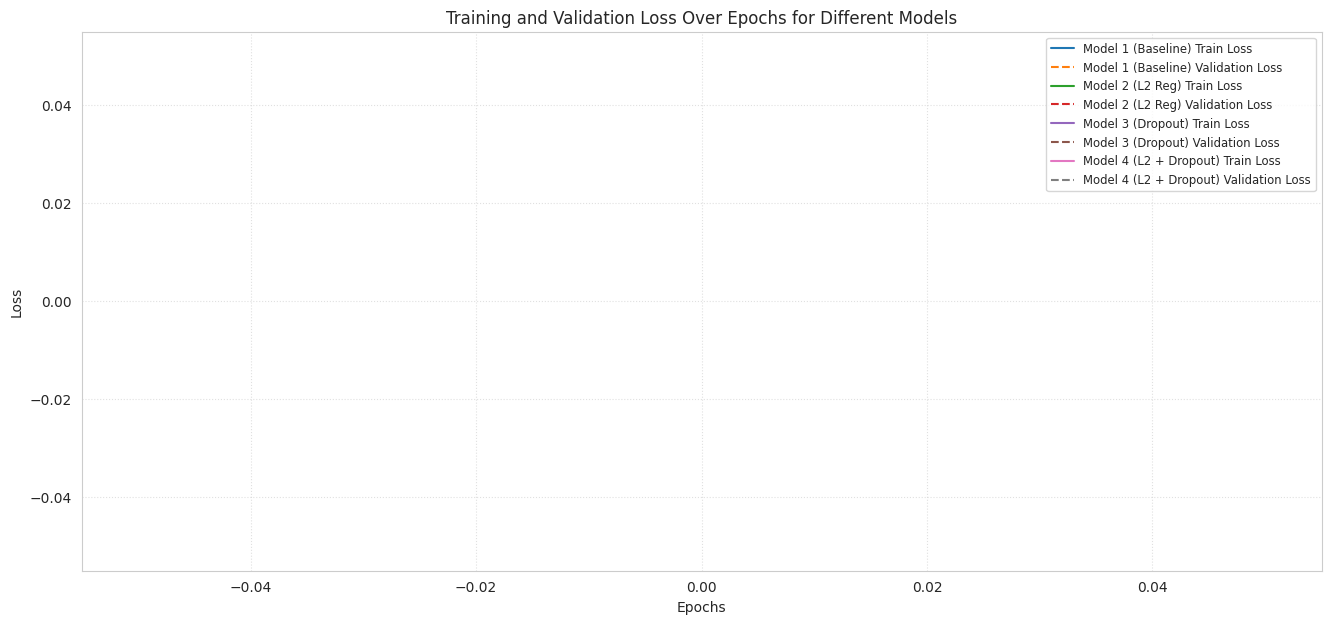

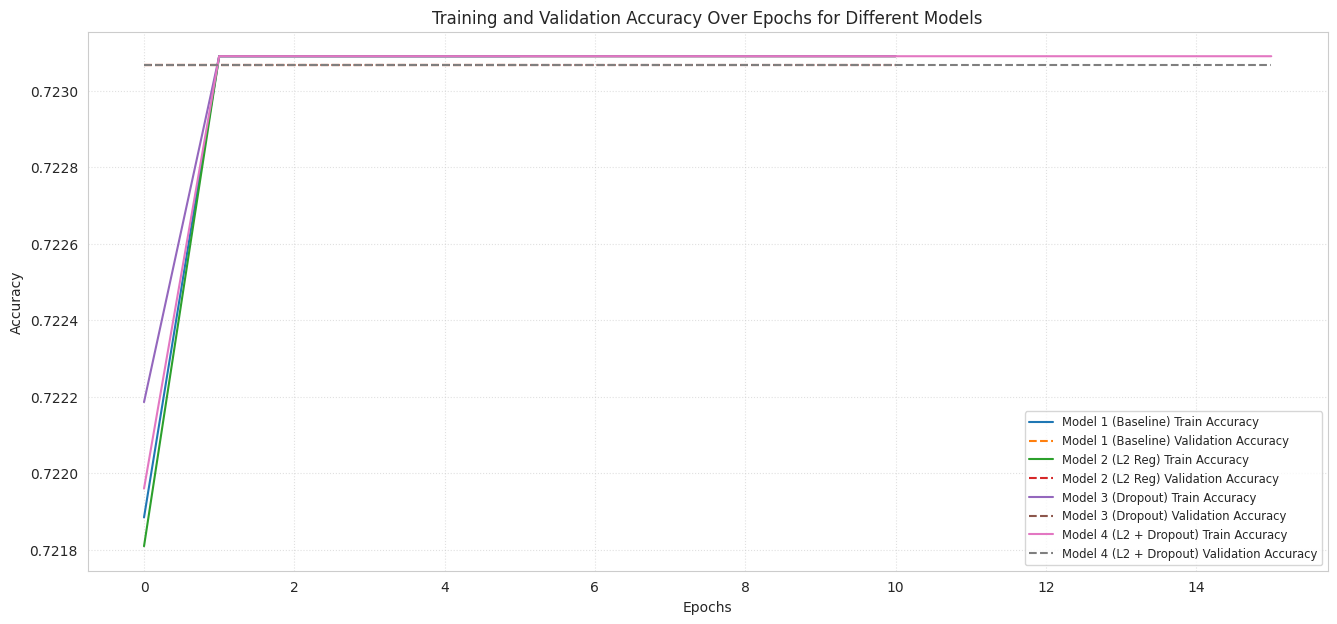

In [41]:


# Set a consistent batch size across all models for fair comparison
BATCH_SIZE = 128 # You can experiment with this value (e.g., 32, 64, 256)

print(f"Starting training for all models with BATCH_SIZE={BATCH_SIZE}\n")

# --- Training Model 1: Baseline (No Regularization) ---
print("--- Training Model 1: Baseline (No Regularization) ---")
# Lower epochs and patience as it's expected to overfit faster
es1 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
history1 = model1_baseline.fit(
    X_train_processed, y_train_encoded,
    epochs=50, # Max epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val_encoded),
    callbacks=[es1],
    verbose=1 # Display training progress
)
print(f"Model 1 finished training in {len(history1.epoch)} epochs (stopped at epoch {es1.stopped_epoch+1}).\n")

# --- Training Model 2: With L2 Regularization ---
print("--- Training Model 2: With L2 Regularization ---")
# More epochs and patience, as regularization can sometimes slow down initial convergence
es2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history2 = model2_l2_reg.fit(
    X_train_processed, y_train_encoded,
    epochs=100, # Max epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val_encoded),
    callbacks=[es2],
    verbose=1
)
print(f"Model 2 finished training in {len(history2.epoch)} epochs (stopped at epoch {es2.stopped_epoch+1}).\n")


# --- Training Model 3: With Dropout Regularization ---
print("--- Training Model 3: With Dropout Regularization ---")
# Similar to L2, Dropout might need more epochs to converge
es3 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history3 = model3_dropout.fit(
    X_train_processed, y_train_encoded,
    epochs=100, # Max epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val_encoded),
    callbacks=[es3],
    verbose=1
)
print(f"Model 3 finished training in {len(history3.epoch)} epochs (stopped at epoch {es3.stopped_epoch+1}).\n")


# --- Training Model 4: With Both L2 and Dropout Regularization ---
print("--- Training Model 4: With Both L2 and Dropout Regularization ---")
# Often requires more epochs due to combined regularization, but can achieve best generalization
es4 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
history4 = model4_l2_dropout.fit(
    X_train_processed, y_train_encoded,
    epochs=150, # Max epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val_encoded),
    callbacks=[es4],
    verbose=1
)
print(f"Model 4 finished training in {len(history4.epoch)} epochs (stopped at epoch {es4.stopped_epoch+1}).\n")


print("\n--- All models have completed training. ---")


# --- Plotting Training History for Comparison ---
histories = {
    "Model 1 (Baseline)": history1,
    "Model 2 (L2 Reg)": history2,
    "Model 3 (Dropout)": history3,
    "Model 4 (L2 + Dropout)": history4,
}

def plot_training_history(histories, metric='loss'):
    """
    Plots the training and validation history for multiple models.
    """
    plt.figure(figsize=(16, 7))
    for name, history in histories.items():
        # Plot training metric
        plt.plot(history.history[metric], label=f'{name} Train {metric.capitalize()}')
        # Plot validation metric
        plt.plot(history.history[f'val_{metric}'], label=f'{name} Validation {metric.capitalize()}', linestyle='--')

    plt.title(f'Training and Validation {metric.capitalize()} Over Epochs for Different Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend(loc='best', fontsize='small')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()

# Plot Loss history
plot_training_history(histories, metric='loss')

# Plot Accuracy history
plot_training_history(histories, metric='accuracy')

In [ ]:
def loss_curve_plot(None):
  epochs = None
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [ ]:
#TODO:
model_2 = define_model('Adam', None)
loss_curve_plot(model_2):
#print out confusion matrix and error analysis metrics after the cell

In [ ]:
#TODO:
model_3 = define_model('RMSPop',None)
loss_curve_plot(model_3):
#print out confusion matrix and error analysis metrics after the cell

In [ ]:
#TODO:
model_4 = define_model(None)
loss_curve_plot(model_4):
#print out confusion matrix and error analysis metrics after the cell

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(None)
    # Make predictions
    predictions = None
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
